# hybrid coordinate to km

In [5]:
# general tools
import sys
import netCDF4 as nc
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# science tools
import metpy.calc
from metpy.units import units

import matplotlib.pyplot as plt

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/utils/')
import data_utils as du
import verif_utils as vu
import graph_utils as gu
from namelist import * 



%matplotlib inline


In [6]:
camp_t2 = gu.cmap_combine(plt.cm.viridis, plt.cm.plasma_r)

In [33]:
with h5py.File('/glade/scratch/ksha/BACKUP/JRA55/JRA_TMEAN_GAMMA_2018_2020.hdf', 'r') as hio:
    lon_025 = hio['lon_025'][...]
    lat_025 = hio['lat_025'][...]
    jra_sfp = hio['jra_sfp'][...]
    jra_var = hio['jra_var'][...]
    jra_height = hio['jra_height'][...]
    jra_lev = hio['jra_lev'][...]
    jra_gamma = hio['jra_gamma'][...]

In [321]:
with nc.Dataset(ERA_TMEAN_dir + '/glade/scratch/ksha/BACKUP/ERA_Interim/TAIR/ei.oper.an.ml.regn128sc.2018010100.sha416571.nc', 'r') as nc_io:
    A = nc_io['lv_HYBL1_a'][...]
    B = nc_io['lv_HYBL1_b'][...]
    x025 = nc_io['g4_lon_5'][...]-360
    y025 = nc_io['g4_lat_4'][...]
    test = nc_io['T_GDS4_HYBL'][...]
lon_025, lat_025 = np.meshgrid(x025, y025)

In [324]:
test.shape

(1, 60, 54, 78)

In [26]:
with h5py.File(ERA_dir + 'ERA_TMEAN_GAMMA_2018_2020.hdf', 'r') as hio:
    lon_025 = hio['lon_025'][...]
    lat_025 = hio['lat_025'][...]
    era_var = hio['era_var'][...]
    era_height = hio['era_height'][...]
    era_gamma = hio['era_gamma'][...]

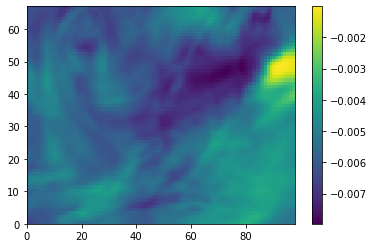

In [34]:
plt.pcolormesh(jra_gamma[0, ...])
plt.colorbar()

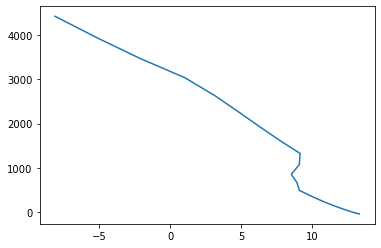

In [32]:
plt.plot(jra_var[0, :, 40, 40], jra_height[0, :, 40, 40])

In [25]:
with h5py.File(JRA_dir+'JRA_TMEAN_correct_2018_2020.hdf', 'r') as hdf_io:
    TMEAN_correct = hdf_io['TMEAN_correct'][...]

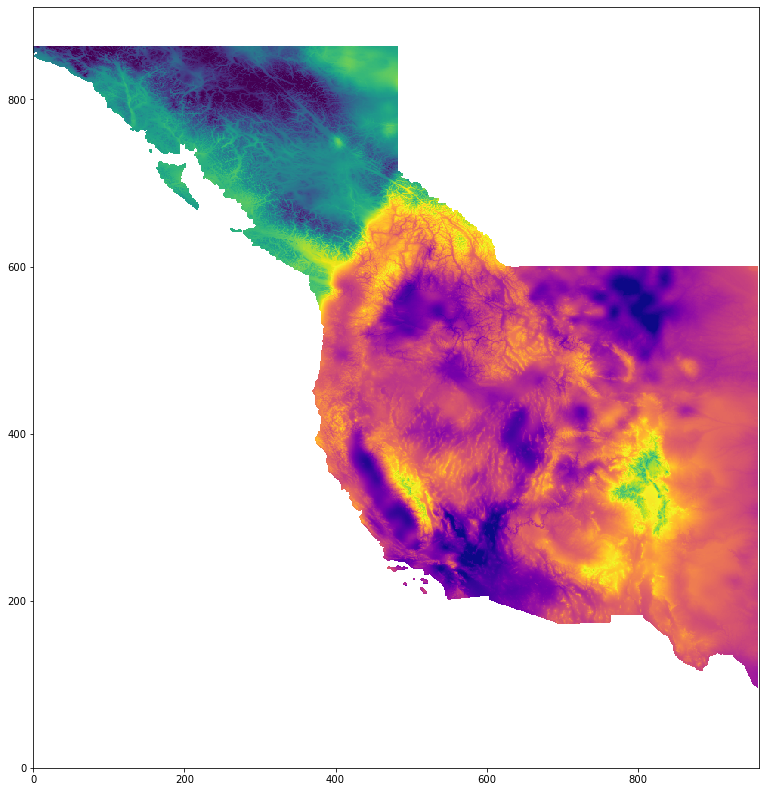

In [27]:
plt.figure(figsize=(13, 14))
plt.pcolormesh(TMEAN_correct[180, ...], vmin=-40, vmax=45, cmap=camp_t2)

In [15]:
np.nanmin(TMEAN_correct[0, ...])

-50.31285734205387

In [10]:
np.nanmax(TMEAN_correct[0, ...])

25.568220870036455